## Task 4: Столбиковые диаграммы

Что, если среднее количество коммитов отличается для рабочих дней и выходных?

Выполните необходимые шаги по созданию следующего графика: 

- Анализируйте только пользователей, а не администраторов.
- Используйте фильтр status = 'ready' для коммитов.
- Размеры шрифта и figsize такие же, как и раньше.
- Для каждого часа подсчитайте среднее количество коммитов в рабочие дни и в выходные (если в течение часа в одну из дат не было коммитов, не используйте его для расчета среднего значения). Используйте эти значения для расчета средних в категории "рабочие дни" и в категории "выходные" и дальнешего построения графика, например: понедельник, 17–18: 5 коммитов; вторник, 17–18: 6 коммитов; среда, 17–18: 7 коммитов.
- Выберите цветовую палитру по своему вкусу, не обязательно использовать те же самые цвета, что на графике выше.


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
conn = sqlite3.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [4]:
query = """
select timestamp as commit_time
from checker
where status = 'ready'
and uid like "user_%"
"""
df = pd.io.sql.read_sql(query, conn, parse_dates = 'commit_time')
df.head()

,commit_time
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104


In [5]:
df['hour'] = df['commit_time'].dt.hour
df['date'] = df['commit_time'].dt.date
df['weekday'] = df['commit_time'].dt.weekday.apply(lambda x: 'weekend' if x > 4 else 'working_day')
df

,commit_time,hour,date,weekday
0,2020-04-17 05:19:02.744528,5,2020-04-17,working_day
1,2020-04-17 05:22:45.549397,5,2020-04-17,working_day
2,2020-04-17 05:34:24.422370,5,2020-04-17,working_day
3,2020-04-17 05:43:27.773992,5,2020-04-17,working_day
4,2020-04-17 05:46:32.275104,5,2020-04-17,working_day
...,...,...,...,...
1681,2020-05-21 20:01:48.959966,20,2020-05-21,working_day
1682,2020-05-21 20:18:54.487900,20,2020-05-21,working_day
1683,2020-05-21 20:19:06.872761,20,2020-05-21,working_day
1684,2020-05-21 20:22:41.877806,20,2020-05-21,working_day


In [6]:
#групируем коммиты
df = df.groupby(by=['hour', 'date', 'weekday'], as_index=False)\
    .agg({'commit_time': 'count'})\
    .rename(columns={'commit_time': 'commits'})
df.head(2)

,hour,date,weekday,commits
0,0,2020-04-19,weekend,1
1,0,2020-04-23,working_day,2


In [7]:
#считаем средний коммит в каждом интервале в будний день и в выходной
df = df.groupby(['weekday', 'hour'], as_index=False).agg({'commits': 'mean'})
df.head()

,weekday,hour,commits
0,weekend,0,1.0
1,weekend,1,3.0
2,weekend,3,1.0
3,weekend,5,1.0
4,weekend,7,2.5


In [8]:
df

,weekday,hour,commits
0,weekend,0,1.000000
1,weekend,1,3.000000
2,weekend,3,1.000000
3,weekend,5,1.000000
4,weekend,7,2.500000
5,weekend,8,4.000000
6,weekend,9,2.166667
7,weekend,10,3.750000
8,weekend,11,12.000000
9,weekend,12,5.166667


In [9]:
df = pd.pivot(df, index='hour', columns='weekday', values='commits')
df.head()

weekday,weekend,working_day
hour,,
0,1.0,2.0
1,3.0,NaN
3,1.0,1.0
5,1.0,4.0
6,NaN,1.0


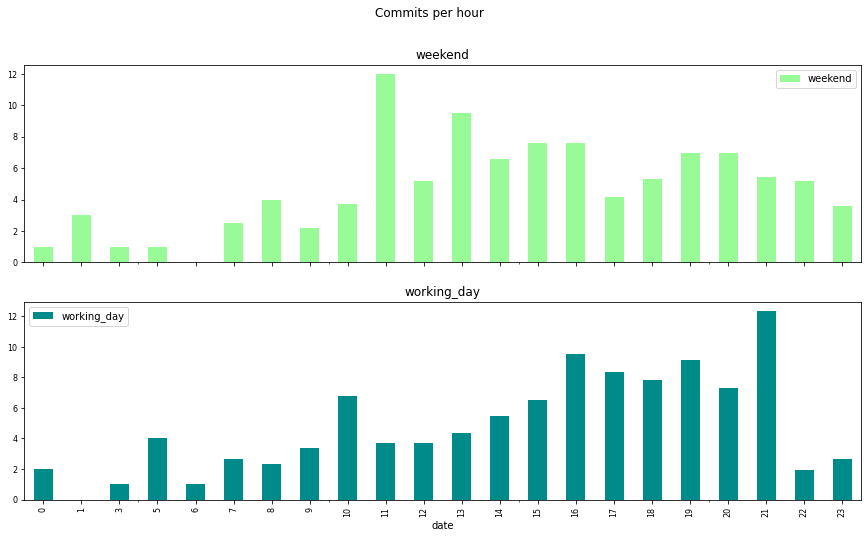

In [10]:
df.plot(y=['weekend', 'working_day'],
        kind = 'bar',
        subplots=True,
        fontsize=8,
        figsize = (15, 8),
        title = "Commits per hour",
        xlabel='date',
        rot=90,
        color = ['palegreen', 'darkcyan']
        )
plt.show()

- В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос:
«Отличается ли динамика в рабочие и выходные дни?». В качестве ответа добавьте значения часа, когда количество коммитов является наибольшим в рабочие дни, и часа, когда количество коммитов является наибольшим в выходные дни.
- Наибольшее значение часа в рабочие дни - 21
- Наибольшее значение часа в выходные дни - 11

In [11]:
conn.close()